# Simple Moving Average (SMA) Crossover Strategy

This is a Colab notebook, but can be run on Jupyter Notebooks, VS Code or other platforms.

 Description:
 - Download historical stock data.
 - Generate entry signals based on when the shorter SMA crosses over the longer SMA.

 NB This is a very basic strategy and profitablity is not guaranteed.


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import requests
import yfinance as yf

In [3]:
# Define functions
def get_yf_data(tickers, start, end):
    """Get OHLCV data from Yahoo Finance"""

    with requests.Session() as session:
        # session.verify = False  # Uncomment if there are SSL errors
        df = yf.download(tickers, start=start, end=end, session=session, progress=False)
    return df


def SMA(data: pd.DataFrame, column: str = 'Close', period: int = 30) -> pd.DataFrame:
    """Calculate the SMA"""

    return data[column].rolling(window=period).mean()

## Get ticker data for different symbols

This is to demonstrate that multiple signals can be downloaded in a single call for more complex analyses, as well as utilising `MultiIndex` DataFrames.

In [4]:
# get 5 year data for different tickers
df = get_yf_data(tickers=['AAPL', 'GOOGL', 'MSFT', 'HDB'], start='2018-12-31', end='2024-12-31')
df  # df is a MultiIndex DataFrame

Price            Close                                           High  \
Ticker            AAPL       GOOGL        HDB        MSFT        AAPL   
Date                                                                    
2018-12-31   37.665615   52.059280  50.145840   95.734688   38.052442   
2019-01-02   37.708599   52.543530  50.184563   95.310524   37.930669   
2019-01-03   33.952541   51.088299  49.289024   91.804276   34.795445   
2019-01-04   35.401955   53.708801  50.140999   96.073990   35.471204   
2019-01-07   35.323154   53.601692  49.884438   96.196556   35.538061   
...                ...         ...        ...         ...         ...   
2024-12-23  255.270004  194.630005  65.120003  435.250000  255.649994   
2024-12-24  258.200012  196.110001  65.190002  439.329987  258.209991   
2024-12-26  259.019989  195.600006  64.769997  438.109985  260.100006   
2024-12-27  255.589996  192.759995  64.599998  430.529999  258.700012   
2024-12-30  252.199997  191.240005  64.139999  424.829987  253.500000   

Price                                                 Low              \
Ticker           GOOGL        HDB        MSFT        AAPL       GOOGL   
Date                                                                    
2018-12-31   52.957525  50.237816   96.517005   37.364746   51.465432   
2019-01-02   52.847926  50.271697   95.904327   36.827490   51.078838   
2019-01-03   53.120433  49.652084   94.433988   33.907172   50.933860   
2019-01-04   53.804953  50.320106   96.620670   34.336985   51.655743   
2019-01-07   53.939465  50.058707   97.337040   34.838425   52.940089   
...                ...        ...         ...         ...         ...   
2024-12-23  195.100006  65.239998  437.649994  253.449997  190.149994   
2024-12-24  196.110001  65.239998  439.600006  255.289993  193.779999   
2024-12-26  196.750000  64.980003  440.940002  257.630005  194.380005   
2024-12-27  195.320007  64.790001  435.220001  253.059998  190.649994   
2024-12-30  192.550003  64.150002  427.549988  250.750000  189.119995   

Price                                    Open                         \
Ticker            HDB        MSFT        AAPL       GOOGL        HDB   
Date                                                                   
2018-12-31  49.380996   94.669610   37.854252   52.700454  50.145840   
2019-01-02  49.748890   93.255768   36.985087   51.174492  49.748890   
2019-01-03  49.177684   91.615761   34.379961   52.343750  49.434250   
2019-01-04  49.511693   93.246344   34.511295   51.939713  49.564943   
2019-01-07  49.555263   95.178609   35.507018   53.853279  49.898959   
...               ...         ...         ...         ...        ...   
2024-12-23  64.370003  432.829987  254.770004  192.619995  64.559998   
2024-12-24  64.849998  434.190002  255.490005  194.839996  65.040001   
2024-12-26  64.599998  436.630005  258.190002  195.149994  64.720001   
2024-12-27  64.269997  426.350006  257.829987  194.949997  64.500000   
2024-12-30  63.619999  421.899994  252.229996  189.800003  64.070000   

Price                      Volume                               
Ticker            MSFT       AAPL     GOOGL      HDB      MSFT  
Date                                                            
2018-12-31   95.470775  140014000  33110000  1112200  33173800  
2019-01-02   93.830723  148158800  31868000   824400  35329300  
2019-01-03   94.349155  365248800  41960000   948000  42579100  
2019-01-04   93.990958  234428400  46022000  1104600  44060600  
2019-01-07   95.800687  219111200  47446000  1117800  35656100  
...                ...        ...       ...      ...       ...  
2024-12-23  436.739990   40858800  25675000  2531600  19152500  
2024-12-24  434.649994   23234700  10403300  1367800   7164500  
2024-12-26  439.079987   27237100  12046600   525700   8194200  
2024-12-27  434.600006   42355300  18891400   712600  18117700  
2024-12-30  426.059998   35557500  14264700  1523200  13158700  

[1510 rows x 20 columns]

### Save data locally
- The Yahoo Finance API is known to be unreliable and also to prevent repeated API calls.
- This also allows repeatable analysis on the same data.

A pickle file is used to save the DataFrame as is, especially for multi-level DataFrames.

NB If the notebook is being used on Colab, the file will be persisted only for the duration of the session. Save it locally or to Google Drive if planning to use the data later.

In [5]:
# Keep the path platform independent
file_path = os.path.join(os.getcwd(), 'data', 'ticker_data.pkl')

In [6]:
# create the data directory if it does not exist
if not os.path.exists('data'):
    os.makedirs('data')

df.to_pickle(file_path)

### Reload data from the pickle file

In [7]:
df = pd.read_pickle(file_path)
df.head()

Price           Close                                        High             \
Ticker           AAPL      GOOGL        HDB       MSFT       AAPL      GOOGL   
Date                                                                           
2018-12-31  37.665615  52.059280  50.145840  95.734688  38.052442  52.957525   
2019-01-02  37.708599  52.543530  50.184563  95.310524  37.930669  52.847926   
2019-01-03  33.952541  51.088299  49.289024  91.804276  34.795445  53.120433   
2019-01-04  35.401955  53.708801  50.140999  96.073990  35.471204  53.804953   
2019-01-07  35.323154  53.601692  49.884438  96.196556  35.538061  53.939465   

Price                                   Low                                   \
Ticker            HDB       MSFT       AAPL      GOOGL        HDB       MSFT   
Date                                                                           
2018-12-31  50.237816  96.517005  37.364746  51.465432  49.380996  94.669610   
2019-01-02  50.271697  95.904327  36.827490  51.078838  49.748890  93.255768   
2019-01-03  49.652084  94.433988  33.907172  50.933860  49.177684  91.615761   
2019-01-04  50.320106  96.620670  34.336985  51.655743  49.511693  93.246344   
2019-01-07  50.058707  97.337040  34.838425  52.940089  49.555263  95.178609   

Price            Open                                      Volume            \
Ticker           AAPL      GOOGL        HDB       MSFT       AAPL     GOOGL   
Date                                                                          
2018-12-31  37.854252  52.700454  50.145840  95.470775  140014000  33110000   
2019-01-02  36.985087  51.174492  49.748890  93.830723  148158800  31868000   
2019-01-03  34.379961  52.343750  49.434250  94.349155  365248800  41960000   
2019-01-04  34.511295  51.939713  49.564943  93.990958  234428400  46022000   
2019-01-07  35.507018  53.853279  49.898959  95.800687  219111200  47446000   

Price                          
Ticker          HDB      MSFT  
Date                           
2018-12-31  1112200  33173800  
2019-01-02   824400  35329300  
2019-01-03   948000  42579100  
2019-01-04  1104600  44060600  
2019-01-07  1117800  35656100

### Get the data for the symbol of interest

In [9]:
# Extract data for a single symbol into a copy of the DataFrame and drop a level.
symbol = 'AAPL'
symbol_data = df.xs(symbol, level='Ticker', axis=1).copy()
symbol_data.head()  # Single level DataFrame at this stage, with Date as the index

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-12-31,37.665615,38.052442,37.364746,37.854252,140014000
2019-01-02,37.708599,37.930669,36.827490,36.985087,148158800
2019-01-03,33.952541,34.795445,33.907172,34.379961,365248800
2019-01-04,35.401955,35.471204,34.336985,34.511295,234428400
2019-01-07,35.323154,35.538061,34.838425,35.507018,219111200


### Display the close prices

In [2]:
plt.style.use('seaborn-v0_8-pastel')

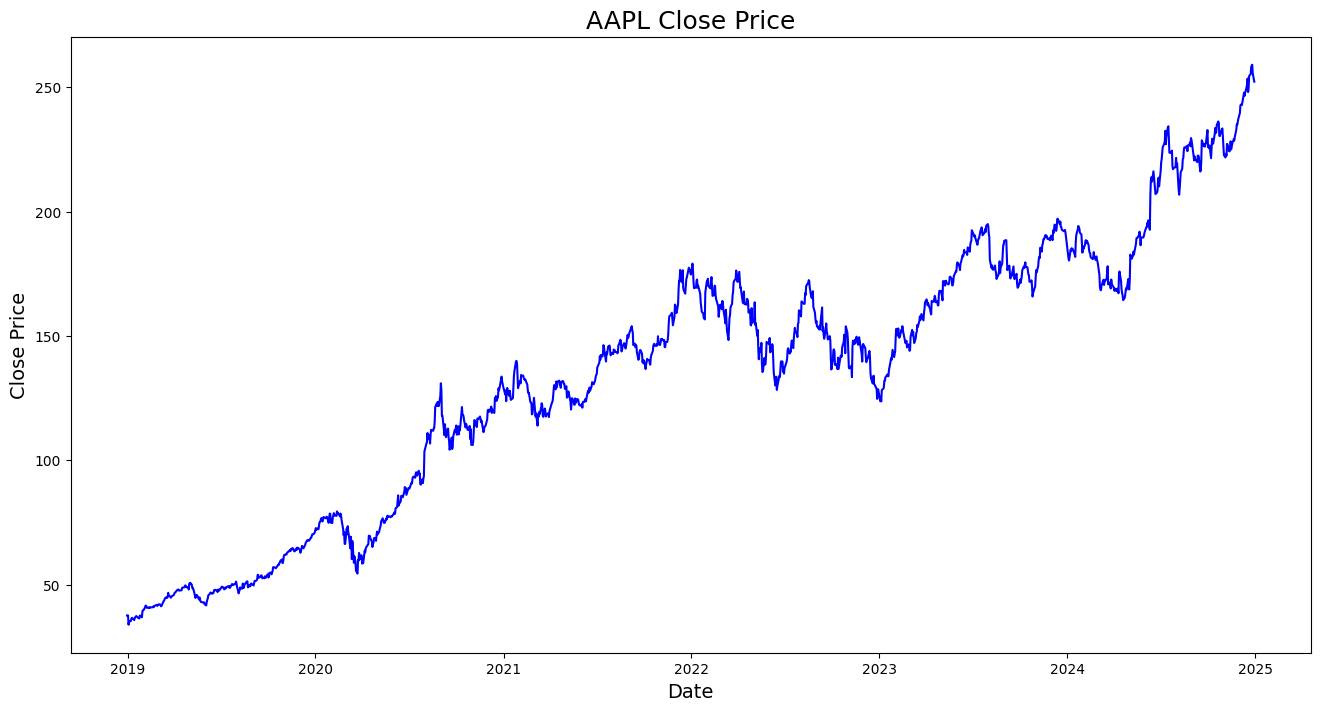

In [10]:
# Display close price
plt.figure(figsize=(16, 8))
plt.title(f'{symbol} Close Price', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.plot(symbol_data['Close'], label=symbol, color='blue')
plt.show()

#### Generate the signal
Buy if SMA20 crosses above SMA50, sell if it crosses below.
No signal if both are equal in case price rebounds.

In [11]:
# Generate SMA columns
symbol_data.loc[:, 'SMA20'] = SMA(symbol_data, period=20)
symbol_data.loc[:, 'SMA50'] = SMA(symbol_data, period=50)

# Generate the buy and sell signals
# Return 1 if SMA20 > SMA50
symbol_data.loc[:, 'Signal'] = np.where(symbol_data['SMA20'] > symbol_data['SMA50'], 1, 0)
# Return 0 if SMA20 == SMA50. Do not overwrite existing signal.
symbol_data.loc[:, 'Signal'] = np.where(symbol_data['SMA20'] == symbol_data['SMA50'], 1, symbol_data['Signal'])
# Return -1 if SMA20 < SMA50. Do not overwrite existing signal.
symbol_data.loc[:, 'Signal'] = np.where(symbol_data['SMA20'] < symbol_data['SMA50'], -1, symbol_data['Signal'])

# Get difference  in signal values for each row
symbol_data.loc[:, 'Position'] = symbol_data['Signal'].diff()

# Buy signal if position is positive, sell if negative. Store corresponding prices for markers.
symbol_data.loc[:, 'Buy'] = np.where(symbol_data['Position'] > 0, symbol_data['Close'], np.NaN)
symbol_data.loc[:, 'Sell'] = np.where(symbol_data['Position'] < 0, symbol_data['Close'], np.NaN)

#### Display close prices with signal markers

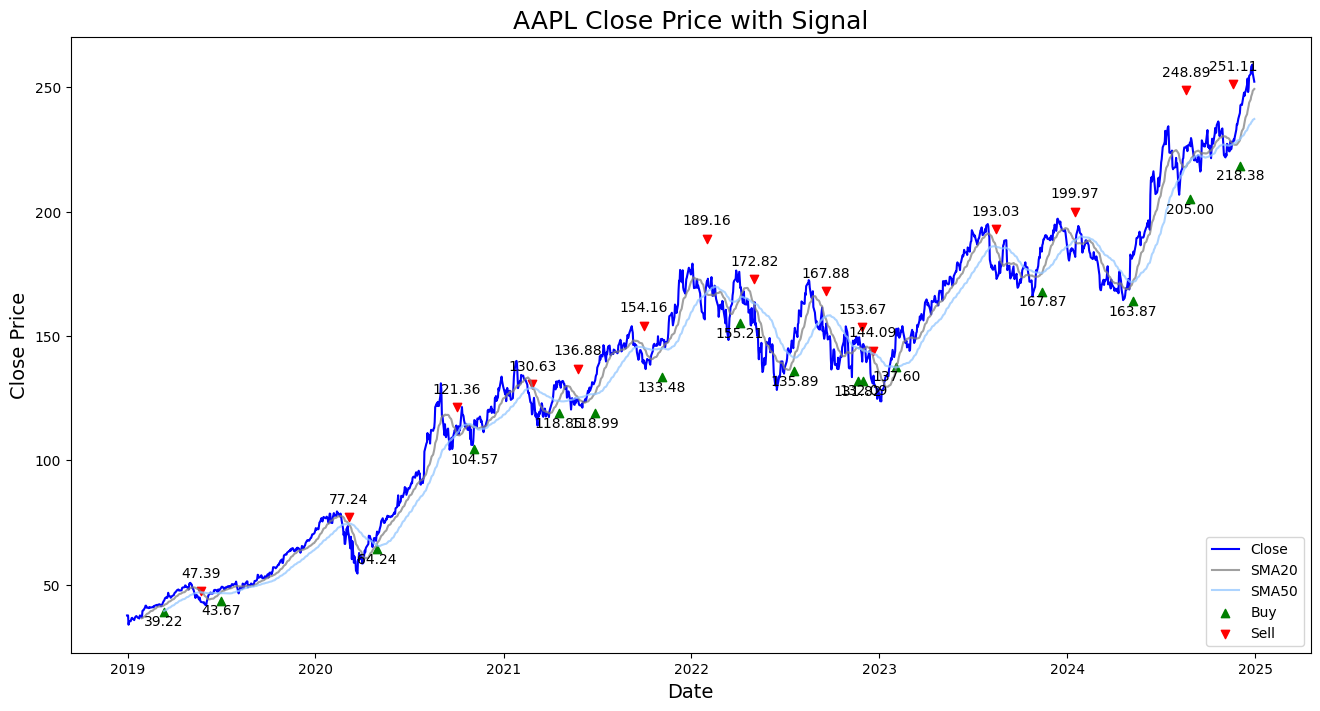

In [38]:
# Display close price with signal
plt.figure(figsize=(16, 8))

# Title and labels
plt.title(f'{symbol} Close Price with Signal', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# Price, and indicators.
plt.plot(symbol_data['Close'], label='Close', color='blue', alpha=1)
plt.plot(symbol_data['SMA20'], label='SMA20', color='grey', alpha=0.75)
plt.plot(symbol_data['SMA50'], label='SMA50', alpha=0.75)

# Add signal markers
plt.scatter(symbol_data.index, symbol_data['Buy'] * (1 - 0.1), marker='^', color='green', alpha=1, label='Buy')
plt.scatter(symbol_data.index, symbol_data['Sell'] * (1 + 0.1), marker='v', color='red', alpha=1, label='Sell')

signal_offset = 0.1  # 10% offset for the signal marker display

# Add value labels for Sell
for i, val in enumerate(symbol_data['Sell'] * (1 + signal_offset)):
    plt.annotate(f'{val:.2f}', (symbol_data.index[i], val), textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust label offset

# Add value labels for Buy
for i, val in enumerate(symbol_data['Buy'] * (1 - signal_offset)):
    plt.annotate(f'{val:.2f}', (symbol_data.index[i], val), textcoords="offset points", xytext=(0, -10), ha='center')  # Adjust label offset

# Display legend. Show plot.
plt.legend(loc='lower right')
plt.show()